# CRISP-DM Quiz

## Quiz 1 - A Look at the Data

In order to get a better understanding of the data we will be looking at throughout this lesson, let's take a look at some of the characteristics of the dataset.

First, let's read in the data and necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./data/survey-results-public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Question 1

**1.** Provide the number of rows and columns in this dataset.

In [2]:
num_rows = df.shape[0]
num_cols = df.shape[1]
print(f"There're {num_rows} rows, {num_cols} columns.")

There're 51392 rows, 154 columns.


### Question 2

**2.** Which columns had no missing values? Provide a set of column names that have no missing values.

In [3]:
#Provide a set of columns with 0 missing values.
no_nulls = set(df.columns[df.notnull().all()])
no_nulls

{'Country',
 'EmploymentStatus',
 'FormalEducation',
 'Professional',
 'ProgramHobby',
 'Respondent',
 'University'}

### Question 3

**3.** Which columns have the most missing values?  Provide a set of column names that have more than 75% if their values missing.

In [4]:
#Provide a set of columns with more than 75% of the values missing
most_missing_cols = set(df.columns[df.isnull().mean() >= 0.75])
most_missing_cols

{'ExCoder10Years',
 'ExCoderActive',
 'ExCoderBalance',
 'ExCoderBelonged',
 'ExCoderNotForMe',
 'ExCoderReturn',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExpectedSalary',
 'MobileDeveloperType',
 'NonDeveloperType',
 'TimeAfterBootcamp',
 'WebDeveloperType',
 'YearsCodedJobPast'}

### Question 4

**4.** Provide a pandas series of the different **Professional** status values in the dataset along with the count of the number of individuals with each status.  Store this pandas series in **status_vals**.  If you are correct, you should see a bar chart of the proportion of individuals in each status.

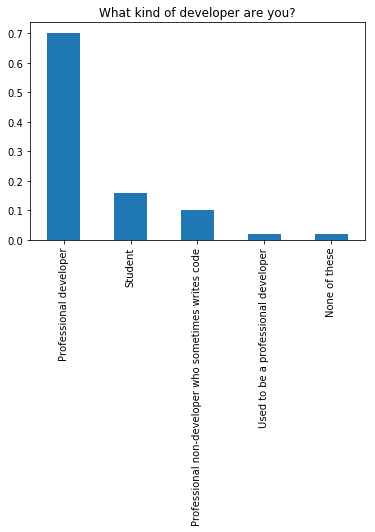

In [5]:
#Provide a pandas series of the counts for each Professional status
status_vals = df['Professional'].value_counts()

# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.
(status_vals/num_rows).plot(kind="bar");
plt.title("What kind of developer are you?");

### Question 5

**5.** Provide a pandas series of the different **FormalEducation** status values in the dataset along with the count of how many individuals received that formal education.  Store this pandas series in **ed_vals**.  If you are correct, you should see a bar chart of the proportion of individuals in each status.

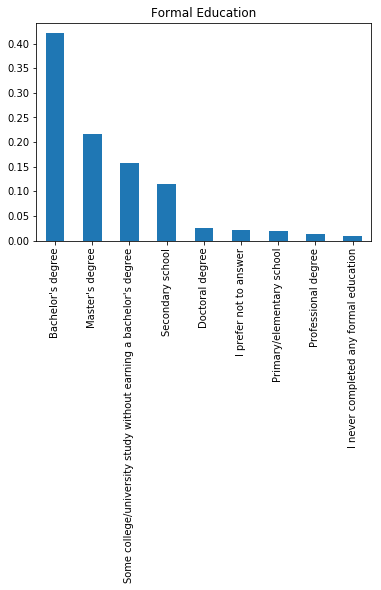

In [6]:
#Provide a pandas series of the counts for each FormalEducation status
ed_vals = df.FormalEducation.value_counts()

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(ed_vals/df.shape[0]).plot(kind="bar");
plt.title("Formal Education");

### Question 6

**6.** Provide a pandas series of the different **Country** values in the dataset along with the count of how many individuals are from each country.  Store this pandas series in **count_vals**.  If you are correct, you should see a bar chart of the proportion of individuals in each country.

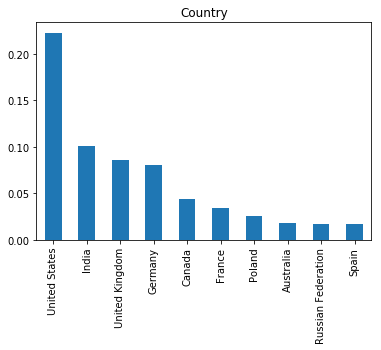

In [7]:
count_vals = df.Country.value_counts()#Provide a pandas series of the counts for each Country

# The below should be a bar chart of the proportion of the top 10 countries for the
# individuals in your count_vals if it is set up correctly.

(count_vals[:10]/df.shape[0]).plot(kind="bar");
plt.title("Country");

Feel free to explore the dataset further to gain additional familiarity with the columns and rows in the dataset.  You will be working pretty closely with this dataset throughout this lesson.

In [8]:
pd.DataFrame(df.query("Professional == 'Professional developer' and (Gender == 'Male' or Gender == 'Female')")
             .groupby(['Gender', 'FormalEducation'])
             .mean()['Salary'])

Salary
Gender FormalEducation                                                 
Female Bachelor's degree                                   60040.908291
       Doctoral degree                                     90623.768006
       I never completed any formal education                       NaN
       I prefer not to answer                              13255.786387
       Master's degree                                     56210.867588
       Primary/elementary school                           32258.064516
       Professional degree                                 45458.307618
       Secondary school                                    41110.162320
       Some college/university study without earning a...  48116.699754
Male   Bachelor's degree                                   57413.518034
       Doctoral degree                                     76872.602904
       I never completed any formal education              43090.588914
       I prefer not to answer                              37629.362623
       Master's degree                                     59156.503938
       Primary/elementary school                           63777.121965
       Professional degree                                 40901.083005
       Secondary school                                    41353.206724
       Some college/university study without earning a...  57262.911063

## Quiz 2 - How To Break Into the Field

Now you have had a closer look at the data, and you saw how I approached looking at how the survey respondents think you should break into the field.  Let's recreate those results, as well as take a look at another question.

In [9]:
schema = pd.read_csv('./data/survey-results-schema.csv')
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


#### Question 1

**1.** In order to understand how to break into the field, we will look at the **CousinEducation** field.  Use the **schema** dataset to answer this question.  Write a function called **get_description** that takes the **schema dataframe** and the **column** as a string, and returns a string of the description for that column.

In [10]:
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema.Column == column_name]['Question'])[0]
    return desc

In [11]:
get_description(df.columns[0]) # This should return a string of the first column description

'Respondent ID number'

In [12]:
descrips = set(get_description(col) for col in df.columns)

The question we have been focused on has been around how to break into the field.  Use your **get_description** function below to take a closer look at the **CousinEducation** column.

In [13]:
get_description('CousinEducation')

"Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\r\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\r\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Wh

#### Question 2

**2.** Provide a pandas series of the different **CousinEducation** status values in the dataset.  Store this pandas series in **cous_ed_vals**.  If you are correct, you should see a bar chart of the proportion of individuals in each status.  If it looks terrible, and you get no information from it, then you followed directions.  However, we should clean this up!

In [14]:
#Provide a pandas series of the counts for each CousinEducation status
cous_ed_vals = df.CousinEducation.value_counts()

cous_ed_vals # assure this looks right

Take online courses; Buy books and work through the exercises                                                                          711
Take online courses                                                                                                                    551
None of these                                                                                                                          523
Take online courses; Part-time/evening courses; Buy books and work through the exercises                                               479
Take online courses; Bootcamp; Part-time/evening courses; Buy books and work through the exercises                                     465
Other                                                                                                                                  403
Return to college; Take online courses; Part-time/evening courses; Buy books and work through the exercises                            384
Take online courses; Contri

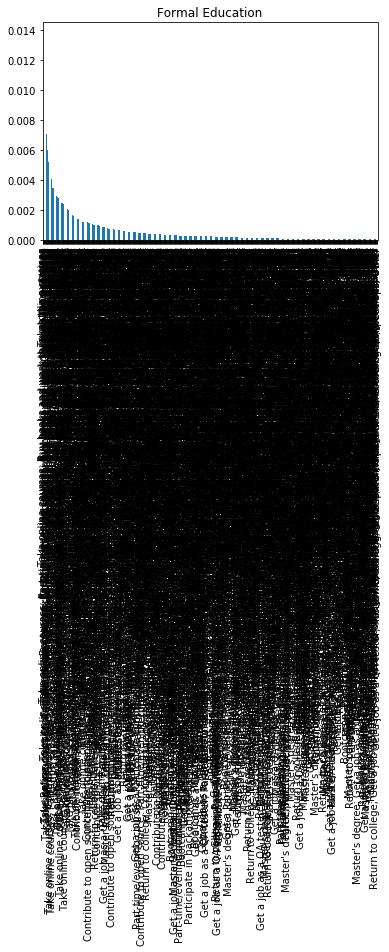

In [15]:
# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(cous_ed_vals/df.shape[0]).plot(kind="bar");
plt.title("Formal Education");

We definitely need to clean this.  Above is an example of what happens when you do not clean your data. Below is what the data look like after cleaning.

In [16]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]
    
    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    from collections import defaultdict
    new_df = defaultdict(int)
    
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

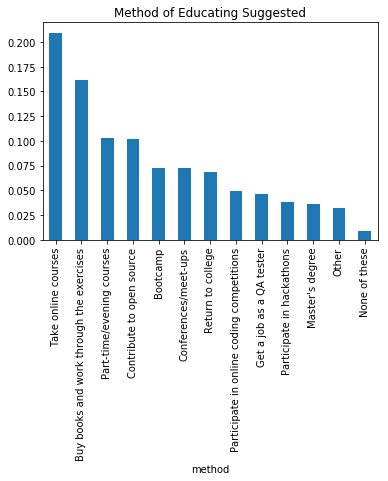

In [17]:
possible_vals = ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 "Contribute to open source", "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]

def clean_and_plot(df, title='Method of Educating Suggested', plot=True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    study = df['CousinEducation'].value_counts().reset_index()
    study.rename(columns={'index': 'method', 'CousinEducation': 'count'}, inplace=True)
    study_df = total_count(study, 'method', 'count', possible_vals)

    study_df.set_index('method', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df
    
props_df = clean_and_plot(df)

#### Question 3

**3.** I wonder if some of the individuals might have bias towards their own degrees.  Complete the function below that will apply to the elements of the **FormalEducation** column in **df**. 

In [18]:
def higher_ed(formal_ed_str):
    '''
    INPUT
        formal_ed_str - a string of one of the values from the Formal Education column
    
    OUTPUT
        return 1 if the string is  in ("Master's degree", "Doctoral", "Professional degree")
        return 0 otherwise
    
    '''
    formal_ed = ["Master's degree", "Doctoral", "Professional degree"]
    if formal_ed_str in formal_ed:
        return 1
    else:
        return 0

df["FormalEducation"].apply(higher_ed)[:5] #Test your function to assure it provides 1 and 0 values for the df

0    0
1    0
2    0
3    0
4    1
Name: FormalEducation, dtype: int64

In [19]:
df['HigherEd'] = df["FormalEducation"].apply(higher_ed)
higher_ed_perc = df['HigherEd'].mean()
higher_ed_perc

0.23069738480697385

#### Question 4

**4.** Now we would like to find out if the proportion of individuals who completed one of these three programs feel differently than those that did not. Store a dataframe of only the individual's who had **HigherEd** equal to 1 in **ed_1**.  Similarly, store a dataframe of only the **HigherEd** equal to 0 values in **ed_0**.

Notice, you have already created the **HigherEd** column using the check code portion above, so here you only need to subset the dataframe using this newly created column.

In [20]:
ed_1 = df[df.HigherEd == 1]# Subset df to only those with HigherEd of 1
ed_0 = df[df.HigherEd == 0]# Subset df to only those with HigherEd of 0

print(ed_1['HigherEd'][:5]) #Assure it looks like what you would expect
print(ed_0['HigherEd'][:5]) #Assure it looks like what you would expect

4     1
6     1
7     1
9     1
14    1
Name: HigherEd, dtype: int64
0    0
1    0
2    0
3    0
5    0
Name: HigherEd, dtype: int64


In [21]:
#Check your subset is correct - you should get a plot that was created using pandas styling
#which you can learn more about here: https://pandas.pydata.org/pandas-docs/stable/style.html

ed_1_perc = clean_and_plot(ed_1, 'Higher Formal Education', plot=False)
ed_0_perc = clean_and_plot(ed_0, 'Max of Bachelors Higher Ed', plot=False)

comp_df = pd.merge(ed_1_perc, ed_0_perc, left_index=True, right_index=True)
comp_df.columns = ['ed_1_perc', 'ed_0_perc']
comp_df['Diff_HigherEd_Vals'] = comp_df['ed_1_perc'] - comp_df['ed_0_perc']
comp_df.style.bar(subset=['Diff_HigherEd_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])

,ed_1_perc,ed_0_perc,Diff_HigherEd_Vals
method,,,
Take online courses,0.207892,0.2099,-0.00200857
Buy books and work through the exercises,0.162073,0.161205,0.00086766
Part-time/evening courses,0.103298,0.103248,4.98833e-05
Contribute to open source,0.097821,0.10323,-0.00540923
Bootcamp,0.0746172,0.071824,0.0027932
Return to college,0.0687279,0.0689754,-0.000247487
Conferences/meet-ups,0.0658422,0.0739201,-0.00807796
Master's degree,0.0589517,0.0293459,0.0296058
Get a job as a QA tester,0.0484688,0.0457388,0.00273003


#### Question 5

**5.** What can you conclude from the above plot?

> 1. Everyone should get a higher level of formal education? **False**
2. Regardless of formal education, online courses are the top suggested form of education? **True**
3. There is less than a 1% difference between suggestions of the two groups for all forms of education? **False**
4. Those with higher formal education suggest it more than those who do not have it? **True**

This concludes another look at the way we could compare education methods by those currently writing code in industry.

## Quiz 3 - Job Satisfaction

You will be exploring job satisfaction according to the survey results. Use the cells at the top of the notebook to explore as necessary, and use your findings to solve the questions at the bottom of the notebook.

### Question 1

**1.** Matching each variable (**a, b, c, d, e, f, g, or h**) as the appropriate key that describes the value in the **job_sol_1** dictionary.

In [22]:
# The proportion of missing values in the Job Satisfaction column
df.JobSatisfaction.isnull().mean()

0.21435242839352428

In [23]:
# According to EmploymentStatus, average job satisfaction of each group
df.groupby('EmploymentStatus').JobSatisfaction.mean().sort_values(ascending=False)

EmploymentStatus
Independent contractor, freelancer, or self-employed    7.252823
Not employed, and not looking for work                  7.000000
Employed full-time                                      6.926805
Employed part-time                                      6.821468
I prefer not to say                                          NaN
Not employed, but looking for work                           NaN
Retired                                                      NaN
Name: JobSatisfaction, dtype: float64

In [24]:
# In general, do smaller companies appear to have employees with higher job satisfaction?
df.groupby('CompanySize').JobSatisfaction.mean().sort_values(ascending=False)

CompanySize
I prefer not to answer      7.280835
Fewer than 10 employees     7.008749
10 to 19 employees          7.000799
20 to 99 employees          6.949092
100 to 499 employees        6.937089
1,000 to 4,999 employees    6.884509
500 to 999 employees        6.883661
I don't know                6.842679
10,000 or more employees    6.810345
5,000 to 9,999 employees    6.748153
Name: JobSatisfaction, dtype: float64

In [25]:
a = 0.734
b = 0.2014
c = 'full-time'
d = 'contractors'
e = 'retired'
f = 'yes'
g = 'no'
h = 'hard to tell'

job_sol_1 = {'The proportion of missing values in the Job Satisfaction column': b,
             'According to EmploymentStatus, which group has the highest average job satisfaction?': d, 
             'In general, do smaller companies appear to have employees with higher job satisfaction?': f}

### Question 2

**2.** Matching each variable (**a, b, c** ) as the appropriate key that describes the value in the **job_sol_2** dictionary. Notice you can have the same letter appear more than once.`

In [26]:
# Do individuals who program outside of work appear to have higher JobSatisfaction?
df.groupby(['ProgramHobby']).mean().JobSatisfaction.sort_values(ascending=False)

ProgramHobby
Yes, both                                    7.108041
Yes, I contribute to open source projects    7.041535
Yes, I program as a hobby                    6.913072
No                                           6.833825
Name: JobSatisfaction, dtype: float64

In [27]:
# Does flexibility to work outside of the office appear to have an influence on JobSatisfaction?
df.groupby(['HomeRemote']).mean().JobSatisfaction.sort_values(ascending=False)

HomeRemote
All or almost all the time (I'm full-time remote)          7.388430
Less than half the time, but at least one day each week    7.120125
A few days each month                                      7.077509
About half the time                                        6.973702
More than half, but not all, the time                      6.953184
It's complicated                                           6.840830
Never                                                      6.632502
Name: JobSatisfaction, dtype: float64

In [28]:
# A friend says a Doctoral degree increases the chance of having job you like, does this seem true?
df.groupby(['FormalEducation']).mean().JobSatisfaction.sort_values(ascending=False)

FormalEducation
Doctoral degree                                                      7.348857
Secondary school                                                     7.143082
Professional degree                                                  7.087459
Some college/university study without earning a bachelor's degree    7.081334
I prefer not to answer                                               7.005682
Primary/elementary school                                            6.956897
Master's degree                                                      6.953151
Bachelor's degree                                                    6.866363
I never completed any formal education                               6.833333
Name: JobSatisfaction, dtype: float64

In [29]:
a = 'yes'
b = 'no'
c = 'hard to tell'

job_sol_2 = {'Do individuals who program outside of work appear to have higher JobSatisfaction?': a,
             'Does flexibility to work outside of the office appear to have an influence on JobSatisfaction?': a, 
             'A friend says a Doctoral degree increases the chance of having job you like, does this seem true?': a}

## Quiz 4 - First Try of Predicting Salary

For the last two questions regarding what are related to relationships of variables with salary and job satisfaction - Each of these questions will involve not only building some sort of predictive model, but also finding and interpretting the influential components of whatever model we build.

To get started let's read in the necessary libraries and take a look at some of our columns of interest.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

Now take a look at the summary statistics associated with the quantitative variables in your dataset. 

In [31]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary,HigherEd
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000,51392.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468,0.230697
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829,0.421283
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484,0.000000
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691,0.000000
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806,0.000000
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000,1.000000


### Question 1

**1.** Use the above to match each variable (**a, b, c, d, e, or f**) as the appropriate key that describes the value in the **desc_sol** dictionary.

In [32]:
a = 40
b = 'HoursPerWeek'
c = 'Salary'
d = 'Respondent'
e = 10
f = 'ExpectedSalary'

desc_sol = {'A column just listing an index for each row': d,
       'The maximum Satisfaction on the scales for the survey': e,
       'The column with the most missing values': f,
       'The variable with the highest spread of values': c}

A picture can often tell us more than numbers.

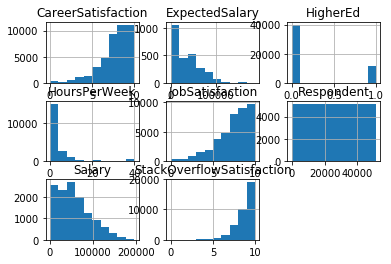

In [33]:
df.hist();

Often a useful plot is a correlation matrix - this can tell you which variables are related to one another.

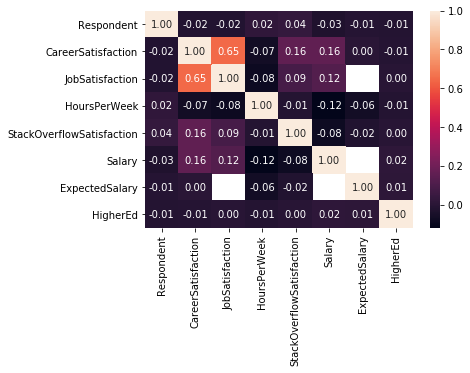

In [34]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

### Question 2

**2.** Use the scatterplot matrix above to match each variable (**a, b, c, d, e, f, or g**) as the appropriate key that describes the value in the **scatter_sol** dictionary.

In [35]:
a = 0.65
b = -0.01
c = 'ExpectedSalary'
d = 'No'
e = 'Yes'
f = 'CareerSatisfaction'
g = -0.15

scatter_sol = {'The column with the strongest correlation with Salary': f,
       'The data suggests more hours worked relates to higher salary': d,
       'Data in the ______ column meant missing data in three other columns': c,
       'The strongest negative relationship had what correlation?': g}

Here we move our quantitative variables to an X matrix, which we will use to predict our response.  We also create our response.  We then split our data into training and testing data.  Then when starting our four step process, our fit step breaks.  

### Remember from the Video, this code will break!

In [36]:
# Consider only numerical variables
X = df[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y = df['Salary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

# Four steps:
# Instantiate
lm_model = LinearRegression(normalize=True)

# Fit - why does this break?
try:
    lm_model.fit(X_train, y_train)
except Exception as e:
    print(e)
#Predict
#Score

Input contains NaN, infinity or a value too large for dtype('float64').


### Question 3

**3.** Use the results above to match each variable (**a, b, c, d, e, or f** ) as the appropriate key that describes the value in the **lm_fit_sol** dictionary.

In [37]:
a = 'it is a way to assure your model extends well to new data'
b = 'it assures the same train and test split will occur for different users'
c = 'there is no correct match of this question'
d = 'sklearn fit methods cannot accept NAN values'
e = 'it is just a convention people do that will likely go away soon'
f = 'python just breaks for no reason sometimes'

lm_fit_sol = {'What is the reason that the fit method broke?': d,
       'What does the random_state parameter do for the train_test_split function?': b,
       'What is the purpose of creating a train test split?': a}

## Quiz 5 - Removing Values

You have seen:

1. sklearn break when introducing missing values
2. reasons for dropping missing values

It is time to make sure you are comfortable with the methods for dropping missing values in pandas.  You can drop values by row or by column, and you can drop based on whether **any** value is missing in a particular row or column or **all** are values in a row or column are missing.

A useful set of many resources in pandas is available [here](https://chrisalbon.com/).  Specifically, Chris takes a close look at missing values [here](https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/).  Another resource can be found [here](https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan).

In [38]:
small_dataset = pd.DataFrame({'col1': [1, 2, np.nan, np.nan, 5, 6], 
                              'col2': [7, 8, np.nan, 10, 11, 12],
                              'col3': [np.nan, 14, np.nan, 16, 17, 18]})

small_dataset

,col1,col2,col3
0,1.0,7.0,NaN
1,2.0,8.0,14.0
2,NaN,NaN,NaN
3,NaN,10.0,16.0
4,5.0,11.0,17.0
5,6.0,12.0,18.0


### Question 1

**1.** Drop any row with a missing value.

In [39]:
all_drop  = small_dataset.dropna()

#print result
all_drop

,col1,col2,col3
1,2.0,8.0,14.0
4,5.0,11.0,17.0
5,6.0,12.0,18.0


### Question 2

**2.** Drop only the row with all missing values.

In [40]:
all_row = small_dataset.dropna(how='all')

#print result
all_row

,col1,col2,col3
0,1.0,7.0,NaN
1,2.0,8.0,14.0
3,NaN,10.0,16.0
4,5.0,11.0,17.0
5,6.0,12.0,18.0


### Question 3

**3.** Drop only the rows with missing values in column 3.

In [41]:
only3_drop = small_dataset[small_dataset.col3.notnull()]
only3_drop = small_dataset.dropna(subset=['col3'], how='any')

#print result
only3_drop

,col1,col2,col3
1,2.0,8.0,14.0
3,NaN,10.0,16.0
4,5.0,11.0,17.0
5,6.0,12.0,18.0


### Question 4

**4.** Drop only the rows with missing values in column 3 or column 1.

In [42]:
only3or1_drop = small_dataset.dropna(subset=['col1', 'col3'])

#print result
only3or1_drop

,col1,col2,col3
1,2.0,8.0,14.0
4,5.0,11.0,17.0
5,6.0,12.0,18.0


## Quiz 6 - Removing Data Part II

So, you now have seen how we can fit a model by dropping rows with missing values.  This is great in that sklearn doesn't break! However, this means future observations will not obtain a prediction if they have missing values in any of the columns.

In this notebook, you will answer a few questions about what happened in the last screencast, and take a few additional steps.

### Question 1

**1.** What proportion of individuals in the dataset reported a salary?

In [43]:
#Subset to only quantitative vars
num_vars = df[['Salary', 'CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]

In [44]:
prop_sals = df.Salary.notnull().mean()
prop_sals

0.25083670610211706

### Question 2

**2.** Remove the rows associated with nan values in Salary (only Salary) from the dataframe **num_vars**.  Store the dataframe with these rows removed in **sal_rem**.

In [45]:
sal_rm = num_vars.dropna(subset=['Salary'])
sal_rm.head()

,Salary,CareerSatisfaction,HoursPerWeek,JobSatisfaction,StackOverflowSatisfaction
2,113750.0,8.0,NaN,9.0,8.0
14,100000.0,8.0,NaN,8.0,8.0
17,130000.0,9.0,NaN,8.0,8.0
18,82500.0,5.0,NaN,3.0,NaN
22,100764.0,8.0,NaN,9.0,8.0


### Question 3

**3.** Using **sal_rm**, create **X** be a dataframe (matrix) of all of the numeric feature variables.  Then, let **y** be the response vector you would like to predict (Salary).  Run the cell below once you have split the data, and use the result of the code to assign the correct letter to **question3_solution**.

In [46]:
X = sal_rm[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y = sal_rm['Salary']

# Split data into training and test data, and fit a linear model
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.30, random_state=42)
lm_model = LinearRegression(normalize=True)

# If our model works, it should just fit our model to the data. Otherwise, it will let us know.
try:
    lm_model.fit(X_train, y_train)
except:
    print("Oh no! It doesn't work!!!")

a = 'Python just likes to break sometimes for no reason at all.' 
b = 'It worked, because Python is magic.'
c = 'It broke because we still have missing values in X'

question3_solution = c

Oh no! It doesn't work!!!


### Question 4

**4.** Remove the rows associated with nan values in any column from **num_vars** (this was the removal process used in the screencast).  Store the dataframe with these rows removed in **all_rem**.

In [47]:
all_rm = num_vars.dropna()
all_rm.head()

,Salary,CareerSatisfaction,HoursPerWeek,JobSatisfaction,StackOverflowSatisfaction
25,175000.000000,7.0,0.0,7.0,9.0
34,14838.709677,10.0,1.0,8.0,10.0
52,15674.203822,6.0,4.0,5.0,8.0
57,43010.752688,10.0,2.0,6.0,10.0
70,65000.000000,8.0,2.0,5.0,7.0


### Question 5

**5.** Using **all_rm**, create **X_2** be a dataframe (matrix) of all of the numeric feature variables.  Then, let **y_2** be the response vector you would like to predict (Salary).  Run the cell below once you have split the data, and use the result of the code to assign the correct letter to **question5_solution**.

In [48]:
X_2 = all_rm[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y_2 = all_rm['Salary']

# Split data into training and test data, and fit a linear model
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2 , test_size=.30, random_state=42)
lm_2_model = LinearRegression(normalize=True)

# If our model works, it should just fit our model to the data. Otherwise, it will let us know.
try:
    lm_2_model.fit(X_2_train, y_2_train)
except:
    print("Oh no! It doesn't work!!!")
    
a = 'Python just likes to break sometimes for no reason at all.' 
b = 'It worked, because Python is magic.'
c = 'It broke because we still have missing values in X'

question5_solution = b

### Question 6

**6.** Now, use **lm_2_model** to predict the **y_2_test** response values, and obtain an r-squared value for how well the predicted values compare to the actual test values.  

In [49]:
y_test_preds = lm_2_model.predict(X_2_test)# Predictions here using X_2 and lm_2_model
r2_test = r2_score(y_2_test, y_test_preds) # Rsquared here for comparing test and preds from lm_2_model

# Print r2 to see result
r2_test

0.030994664959115625

### Question 7

**7.** Use what you have learned **from the second model you fit** (and as many cells as you need to find the answers) to complete the dictionary with the variables that link to the corresponding descriptions.

In [50]:
a = 5009
b = 'Other'
c = 645
d = 'We still want to predict their salary'
e = 'We do not care to predict their salary'
f = False
g = True

question7_solution = {'The number of reported salaries in the original dataset': a,
                       'The number of test salaries predicted using our model': c,
                       'If an individual does not rate stackoverflow, but has a salary': d,
                       'If an individual does not have a a job satisfaction, but has a salary': d,
                       'Our model predicts salaries for the two individuals described above.': f}

## Quiz 7 - Imputation Methods & Resources
One of the most common methods for working with missing values is by imputing the missing values.  Imputation means that you input a value for values that were originally missing. 

It is very common to impute in the following ways:
1. Impute the **mean** of a column.<br><br>

2. If you are working with categorical data or a variable with outliers, then use the **mode** of the column.<br><br>

3. Impute 0, a very small number, or a very large number to differentiate missing values from other values.<br><br>

4. Use knn to impute values based on features that are most similar.<br><br>

In general, you should try to be more careful with missing data in understanding the real world implications and reasons for why the missing values exist.  At the same time, these solutions are very quick, and they enable you to get models off the ground.  You can then iterate on your feature engineering to be more careful as time permits.

Let's take a look at how some of them work. Chris' content is again very helpful for many of these items - and you can access it [here](https://chrisalbon.com/).  He uses the [sklearn.preprocessing library](http://scikit-learn.org/stable/modules/preprocessing.html).  There are also a ton of ways to fill in missing values directly using pandas, which can be found [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)

Create the dataset you will be using for this notebook using the code below.

In [51]:
missing_dataset = pd.DataFrame({'A':[np.nan, 2, np.nan, 0, 7, 10, 15],
                   'B':[3, 4, 5, 1, 2, 3, 5],
                   'C':[np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                   'D':[np.nan, True, np.nan, False, True, False, np.nan],
                   'E':['Yes', 'No', 'Maybe', np.nan, np.nan, 'Yes', np.nan]})
missing_dataset

,A,B,C,D,E
0,NaN,3,NaN,NaN,Yes
1,2.0,4,NaN,True,No
2,NaN,5,NaN,NaN,Maybe
3,0.0,1,NaN,False,NaN
4,7.0,2,NaN,True,NaN
5,10.0,3,NaN,False,Yes
6,15.0,5,NaN,NaN,NaN


### Question 1

**1.** Use the dictionary below to label the columns as the appropriate data type.

In [52]:
a = 'categorical'
b = 'quantitative'
c = 'we cannot tell'
d = 'boolean - can treat either way'

question1_solution = {'Column A is': b,
                      'Column B is': b,
                      'Column C is': c,
                      'Column D is': d,
                      'Column E is': a
                     }

### Question 2

**2.** Are there any columns or rows that you feel comfortable dropping in this dataframe?

In [53]:
a = "Yes"
b = "No"

should_we_drop = a

> You should feel comfortable dropping any rows or columns that are completely missing values (or if they are all the exact same value).  However, dropping other columns or rows, even if only containing a few values, should go through further consideration.

In [54]:
# Use this cell to drop any columns or rows you feel comfortable dropping based on the above
new_df = missing_dataset.dropna(axis=1, how='all')
new_df

,A,B,D,E
0,NaN,3,NaN,Yes
1,2.0,4,True,No
2,NaN,5,NaN,Maybe
3,0.0,1,False,NaN
4,7.0,2,True,NaN
5,10.0,3,False,Yes
6,15.0,5,NaN,NaN


### Question 3

**3.** Using **new_df**, I wrote a lambda function that you can use to impute the mean for the columns of your dataframe using the **apply** method.  Use as many cells as you need to correctly fill in the dictionary **impute_q3** to answer a few questions about your findings.

In [55]:
fill_mean = lambda col: col.fillna(col.mean())

try:
    new_df.apply(fill_mean, axis=0)
except:
    print('That broke...')

That broke...


In [56]:
# Check what you need to answer the questions below
cols = ['A', 'D', 'E']
for col in cols:
    try:
        print(f"This is column {col}")
        print(fill_mean(new_df[col]))
    except Exception as e:
        print(e)

This is column A
0     6.8
1     2.0
2     6.8
3     0.0
4     7.0
5    10.0
6    15.0
Name: A, dtype: float64
This is column D
0      0.5
1     True
2      0.5
3    False
4     True
5    False
6      0.5
Name: D, dtype: object
This is column E
can only concatenate str (not "int") to str


In [57]:
a = "fills with the mean, but that doesn't actually make sense in this case."
b = "gives an error."
c = "is no problem - it fills the NaN values with the mean as expected."


impute_q3 = {'Filling column A': c,
             'Filling column D': a,
             'Filling column E': b
}

> Only the first column fills with the mean correctly. We can't fill the mean of a categorical variable, and the boolean treats the True as 1 and False as 0 to give values that are not 1 or 0.

### Question 4

**4.** Given the results above, it might make more sense to fill some columns with the mode.  Write your own function to fill a column with the mode value, and use it on the two columns that might benefit from this type of imputation.  Use the dictionary **impute_q4** to answer some questions about your findings.

In [58]:
fill_mode = lambda col: col.fillna(col.mode().iloc[0])
new_df.apply(fill_mode, axis=0)

,A,B,D,E
0,0.0,3,False,Yes
1,2.0,4,True,No
2,0.0,5,False,Maybe
3,0.0,1,False,Yes
4,7.0,2,True,Yes
5,10.0,3,False,Yes
6,15.0,5,False,Yes


In [59]:
new_df

,A,B,D,E
0,NaN,3,NaN,Yes
1,2.0,4,True,No
2,NaN,5,NaN,Maybe
3,0.0,1,False,NaN
4,7.0,2,True,NaN
5,10.0,3,False,Yes
6,15.0,5,NaN,NaN


In [60]:
a = "Did not impute the mode."
b = "Imputes the mode."

impute_q4 = {'Filling column A': a,
             'Filling column D': a,
             'Filling column E': b}

> Only one of these columns actually imputed a mode.  None of the values in the first column appeared more than once, and 0 was imputed for all of the NaN values.  There were an even number of True and False values in col D, and False was imputed for all the NaN values.

You saw two of the most common ways to impute values in this notebook, and hopefully, you realized that even these methods have complications. Again, these methods can be a great first step to get your models off the ground, but there are potentially detrimental aspects to the bias introduced into your models using these methods.